# 数据可视化作业题目

In [218]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

## 练习1：航班乘客变化分析 (2个题)

1. 分析年度乘客总量的变化情况（提示：折线图）
2. 分析乘客量在一年中12个月份的分布（提示：柱状图）

In [29]:
data = sns.load_dataset("flights")
data.head()
# 年份，月份，乘客数

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


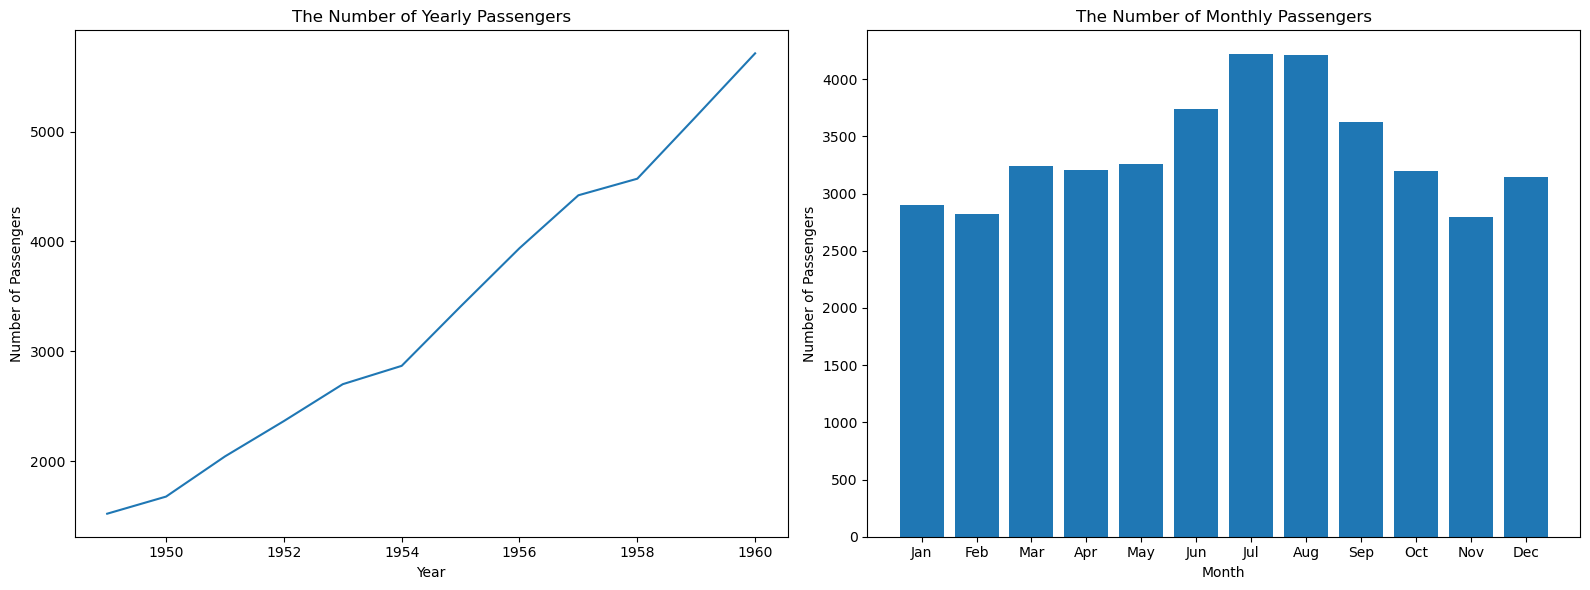

In [35]:
#将数据按照年份分组并对乘客数聚合操作并求和
passengers_by_year = data.groupby('year').agg({'passengers':'sum'})

#将数据按照月份分组并对乘客数聚合操作并求和
passengers_by_month = data.groupby('month',observed=True).agg({'passengers':'sum'})

#绘制多图
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

ax1.plot(passengers_by_year)#绘制折线图
ax1.set_title('The Number of Yearly Passengers')#设置标题
ax1.set_xlabel('Year')#设置x轴标签
ax1.set_ylabel('Number of Passengers')# 设置y轴标签

ax2.bar(passengers_by_month.index,passengers_by_month['passengers'])#绘制柱状图
ax2.set_title('The Number of Monthly Passengers')#设置标题
ax2.set_xlabel('Month')# 设置x轴标签
ax2.set_ylabel('Number of Passengers')# 设置y轴标签

#plt.tight_layout()
plt.show()#显示图形


## 练习2：鸢尾花花型尺寸分析 (3个题)

1. 萼片（sepal）和花瓣（petal）的大小关系（提示：散点图）
2. 不同种类（species）鸢尾花萼片和花瓣的大小关系（提示：箱图或者提琴图）
3. 不同种类鸢尾花萼片和花瓣大小的分布情况（六角箱图或者核密度估计）

In [4]:
data = sns.load_dataset("iris")
data.head()
# 萼片长度，萼片宽度，花瓣长度，花瓣宽度，种类

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


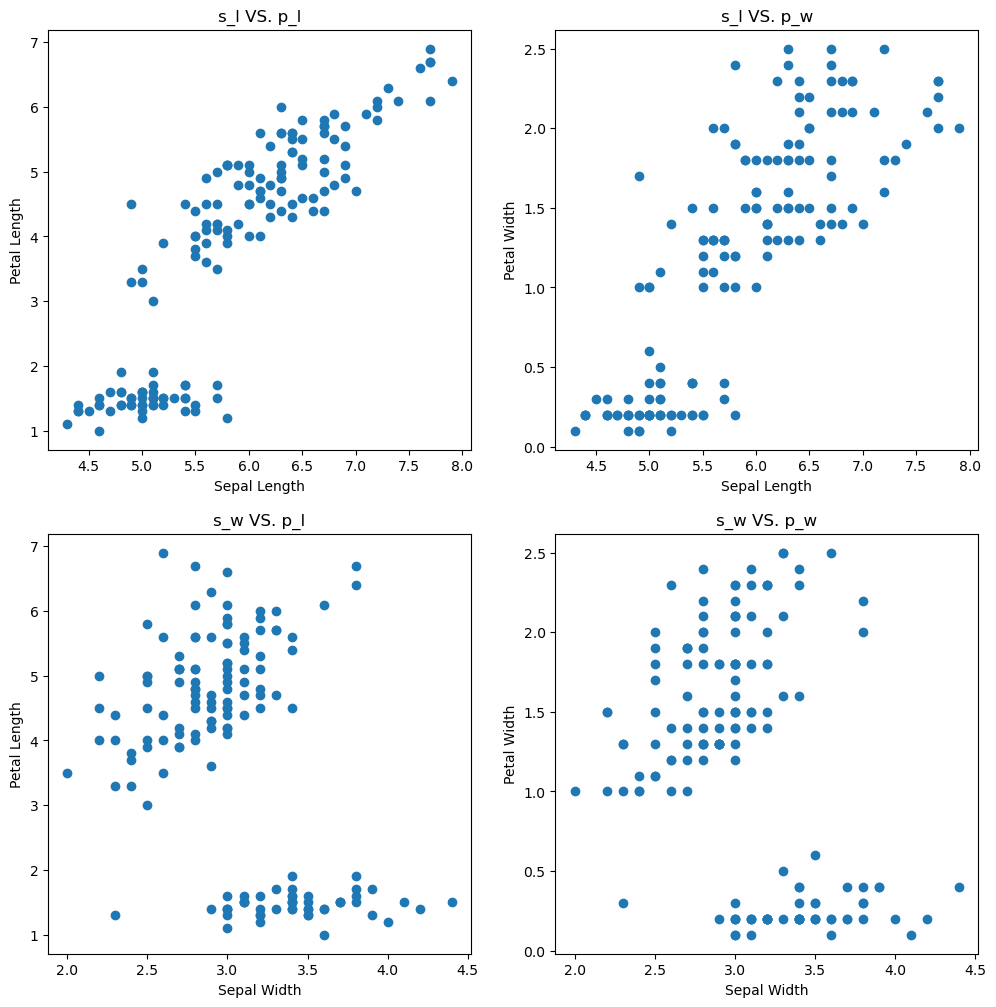

In [41]:
#问题1
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 12))#创建一个2*2的画布

ax1.scatter(data["sepal_length"], data["petal_length"])#绘制散点图
ax1.set_xlabel("Sepal Length")      #设置x轴标签
ax1.set_ylabel("Petal Length")      #设置y轴标签
ax1.set_title("s_l VS. p_l")        #设置标题

ax2.scatter(data["sepal_length"], data["petal_width"])  #绘制散点图
ax2.set_xlabel("Sepal Length")    #设置x轴标签
ax2.set_ylabel("Petal Width")     #设置y轴标签
ax2.set_title("s_l VS. p_w")      #设置标题

ax3.scatter(data["sepal_width"], data["petal_length"])  #绘制散点图
ax3.set_xlabel("Sepal Width")       #设置x轴标签    
ax3.set_ylabel("Petal Length")      #设置y轴标签
ax3.set_title("s_w VS. p_l")        #设置标题

ax4.scatter(data["sepal_width"], data["petal_width"])   #绘制散点图
ax4.set_xlabel("Sepal Width")       #设置x轴标签    
ax4.set_ylabel("Petal Width")       #设置y轴标签
ax4.set_title("s_w VS. p_w")        #设置标题


plt.show()  #显示图形

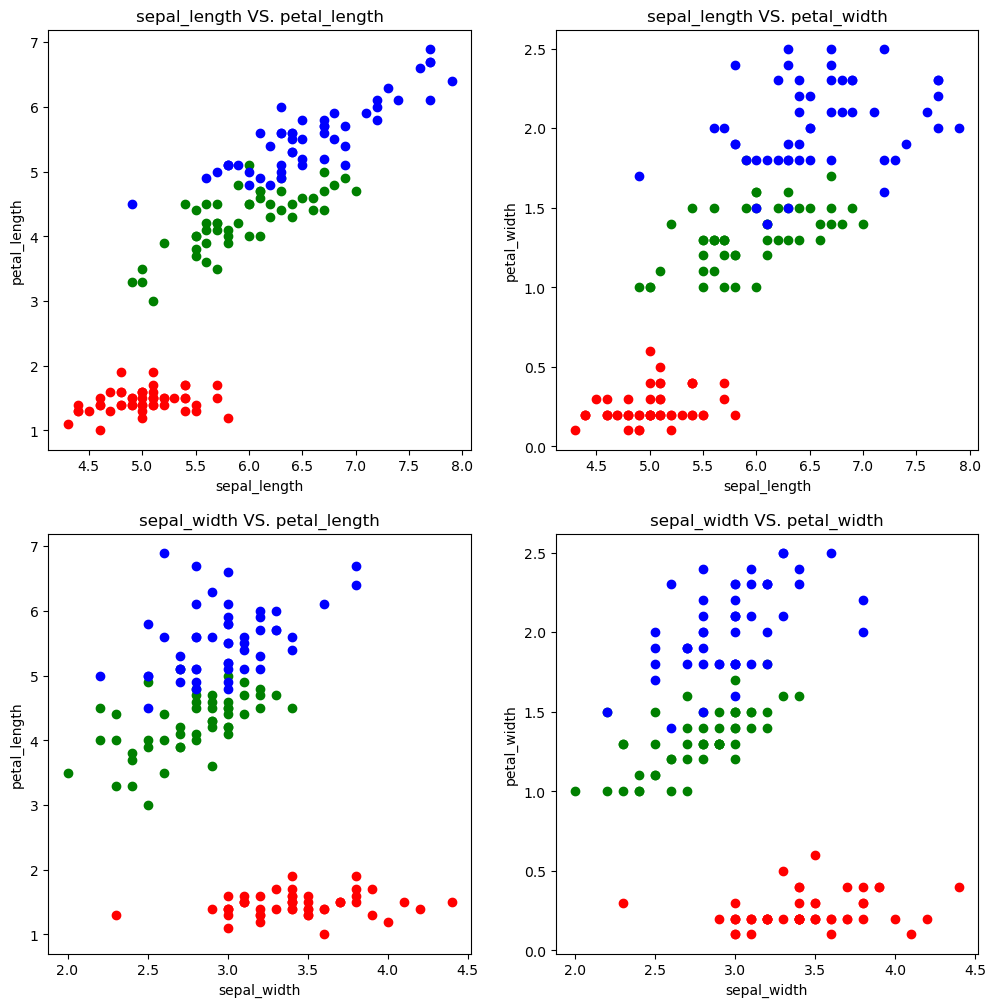

In [57]:
#问题2
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 12))#创建一个2*2的画布
ax=[ax1,ax2,ax3,ax4]
# 获取不同种类
species = data["species"].unique()
    
# 设置不同种类对应的颜色
colors = ["red", "green", "blue"]

input_variables = [("sepal_length", "petal_length"), ("sepal_length", "petal_width"), ("sepal_width", "petal_length"), ("sepal_width", "petal_width")]    

# 循环绘制子图
for i, (label1, label2) in enumerate(input_variables):
    current_ax = ax[i]  # 获取当前子图对象
    
    # 绘制散点图
    for j, specie in enumerate(species):
        specie_data = data[data["species"] == specie]
        current_ax.scatter(specie_data[label1], specie_data[label2], color=colors[j], label=specie)
    
    current_ax.set_xlabel(label1)
    current_ax.set_ylabel(label2)
    current_ax.set_title(f"{label1} VS. {label2}")

# 显示图形
plt.show()


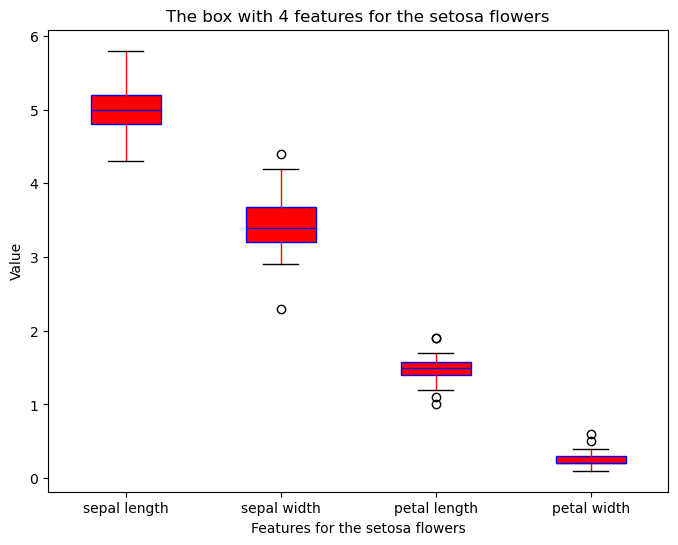

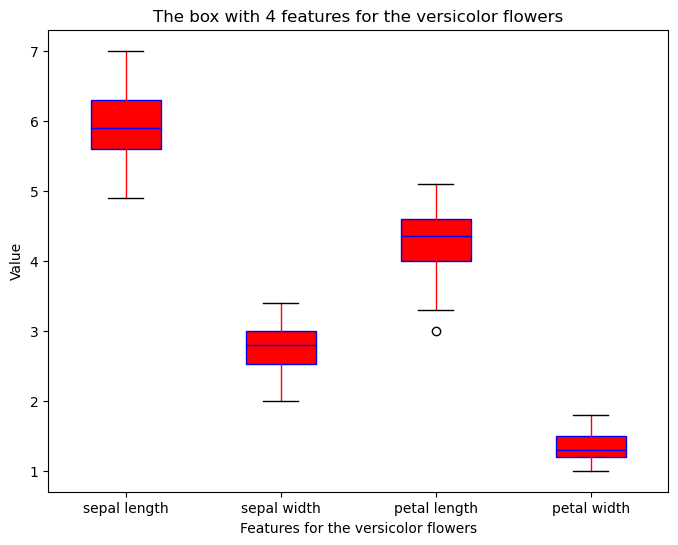

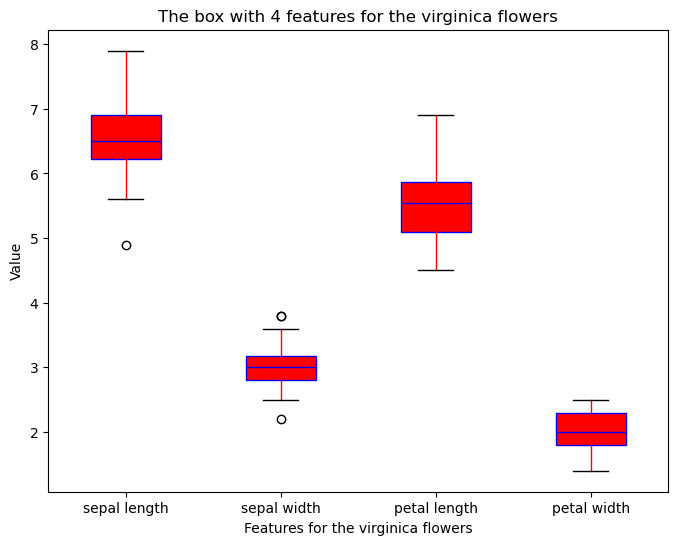

In [9]:
def Boxplot_by_species(data,specie,base_color,edge_color,median_color):
   
        specie_data = data[data["species"] == specie]
        plt.boxplot(specie_data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']] 
                    , patch_artist = True # 
                    , medianprops = {'color': edge_color} # 中位数线颜色
                    , boxprops = {'color': edge_color, 'facecolor': median_color} # 箱体颜色
                    # 猫须颜色whisker
                    , whiskerprops = {'color': median_color}# 猫须界限颜色whisker cap
                    , capprops = {'color': base_color}) # 猫须界限颜色whisker cap
        plt.xticks([1, 2, 3, 4], ['sepal length', 'sepal width', 'petal length', 'petal width'])
        plt.title('The box with 4 features for the ' + specie +' flowers')
        plt.xlabel('Features for the ' + specie +' flowers')
        plt.ylabel('Value')

species = data["species"].unique()
for num, specie in enumerate(species):   
    plt.figure(num,figsize=(8, 6))
    Boxplot_by_species(data,specie,'black','blue','red')


plt.show()


## 练习3：餐厅小费情况分析 (7个题)

1. 小费和总消费之间的关系（提示：散点图+回归分析）
2. 男性顾客和女性顾客，谁更慷慨（提示：箱图或者提琴图）
3. 抽烟与否是否会对小费金额产生影响（提示：箱图或者提琴图）
4. 工作日和周末，什么时候顾客给的小费更慷慨（提示：箱图或者提琴图）
5. 午饭和晚饭，哪一顿顾客更愿意给小费（提示：箱图或者提琴图）
6. 就餐人数是否会对慷慨度产生影响（提示：箱图或者提琴图）
7. 性别+抽烟的组合因素对慷慨度的影响（提示：统计柱状图）

In [102]:
data = sns.load_dataset("tips")
data.head()
# 总消费，小费，性别，吸烟与否，就餐星期，就餐时间，就餐人数

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


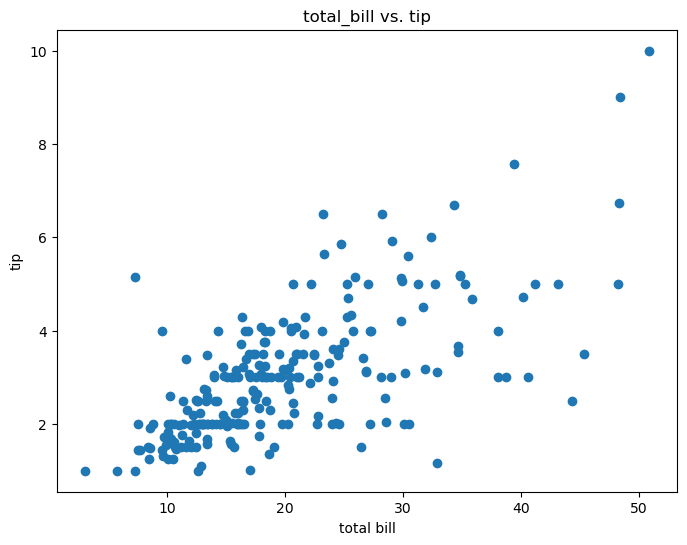

In [13]:
#问题1
plt.figure(figsize=(8, 6))#创建画布
plt.scatter(data["total_bill"], data["tip"])#绘制散点图
plt.title("total_bill vs. tip")#设置标题
plt.xlabel("total bill")#设置x轴标签
plt.ylabel("tip")#设置y轴标签
plt.show()#显示图形

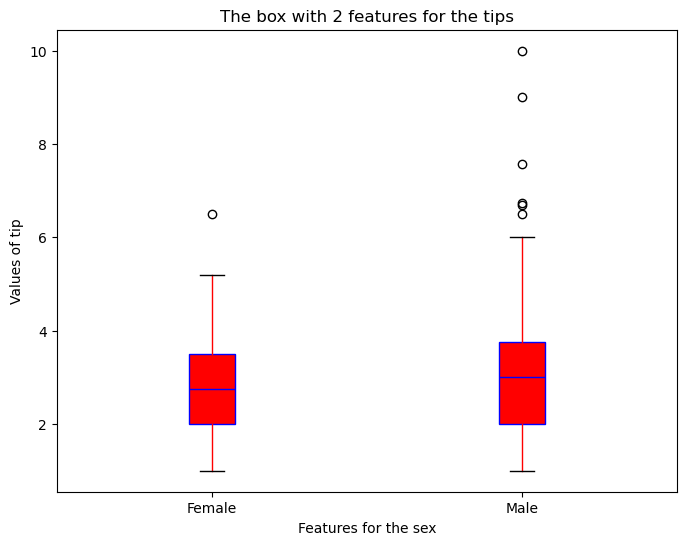

In [45]:
#问题2
plt.figure(figsize=(8, 6))#创建画布
def Boxplot_tip_by_sex(data,base_color,edge_color,median_color):
    
    tip_by_sex_data =  data.groupby('sex',observed= True)['tip']
    
    plt.boxplot([tip_by_sex_data.get_group('Female'),tip_by_sex_data.get_group('Male')]
                    , patch_artist = True # 箱子是否颜色填充
                    , medianprops = {'color': edge_color} # 中位数线颜色
                    , boxprops = {'color': edge_color, 'facecolor': median_color} # 箱体颜色
                    # 猫须颜色whisker
                    , whiskerprops = {'color': median_color}# 猫须界限颜色whisker cap
                    , capprops = {'color': base_color}) # 猫须界限颜色whisker cap
    plt.xticks([1, 2], ['Female', 'Male'])
    plt.title('The box with 2 features for the tips')
    plt.xlabel('Features for the sex')
    plt.ylabel('Values of tip')
    plt.show()

Boxplot_tip_by_sex(data,'black','blue','red')



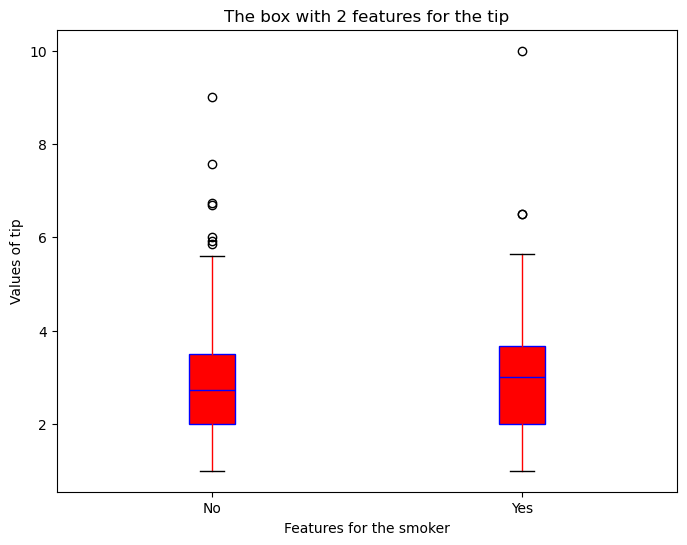

In [48]:
#问题3
plt.figure(figsize=(8, 6))#创建画布
def Boxplot_tip_by_smoker(data,base_color,edge_color,median_color):
    
    tip_by_smoker_data =  data.groupby('smoker',observed= True)['tip']
    
    plt.boxplot([tip_by_smoker_data.get_group('No'),tip_by_smoker_data.get_group('Yes')]
                    , patch_artist = True # 箱子是否颜色填充
                    , medianprops = {'color': edge_color} # 中位数线颜色
                    , boxprops = {'color': edge_color, 'facecolor': median_color} # 箱体颜色
                    # 猫须颜色whisker
                    , whiskerprops = {'color': median_color}# 猫须界限颜色whisker cap
                    , capprops = {'color': base_color}) # 猫须界限颜色whisker cap
    plt.xticks([1, 2], ['No', 'Yes'])
    plt.title('The box with 2 features for the tip')
    plt.xlabel('Features for the smoker')
    plt.ylabel('Values of tip')
    plt.show()

Boxplot_tip_by_smoker(data,'black','blue','red')

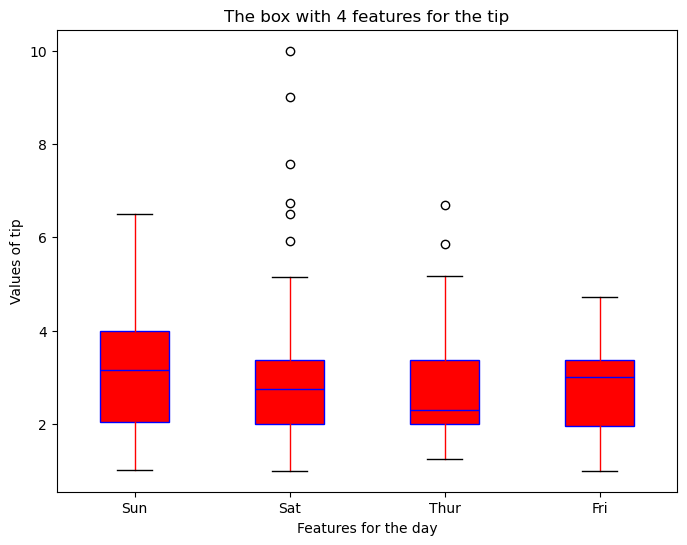

In [50]:
#问题4
plt.figure(figsize=(8, 6))#创建画布
def Boxplot_tip_by_day(data,base_color,edge_color,median_color):
    
    tip_by_day_data =  data.groupby('day',observed= True)['tip']
    
    plt.boxplot([tip_by_day_data.get_group('Sun'),tip_by_day_data.get_group('Sat'),tip_by_day_data.get_group('Thur'),tip_by_day_data.get_group('Fri')]
                    , patch_artist = True # 箱子是否颜色填充
                    , medianprops = {'color': edge_color} # 中位数线颜色
                    , boxprops = {'color': edge_color, 'facecolor': median_color} # 箱体颜色
                    # 猫须颜色whisker
                    , whiskerprops = {'color': median_color}# 猫须界限颜色whisker cap
                    , capprops = {'color': base_color}) # 猫须界限颜色whisker cap
    plt.xticks([1, 2, 3, 4], ['Sun', 'Sat', 'Thur', 'Fri'])
    plt.title('The box with 4 features for the tip')
    plt.xlabel('Features for the day')
    plt.ylabel('Values of tip')
    plt.show()

Boxplot_tip_by_day(data,'black','blue','red')

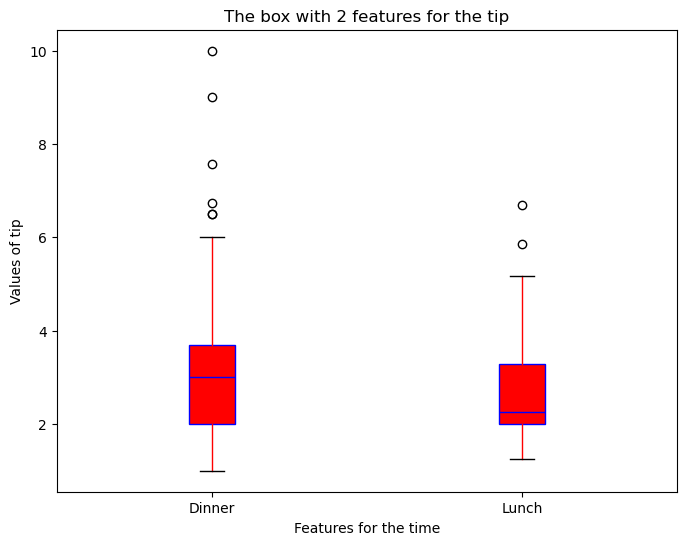

In [51]:
#问题5
plt.figure(figsize=(8, 6))#创建画布
def Boxplot_tip_by_time(data,base_color,edge_color,median_color):
    
    tip_by_time_data =  data.groupby('time',observed= True)['tip']
    
    plt.boxplot([tip_by_time_data.get_group('Dinner'),tip_by_time_data.get_group('Lunch')]
                    , patch_artist = True # 箱子是否颜色填充
                    , medianprops = {'color': edge_color} # 中位数线颜色
                    , boxprops = {'color': edge_color, 'facecolor': median_color} # 箱体颜色
                    # 猫须颜色whisker
                    , whiskerprops = {'color': median_color}# 猫须界限颜色whisker cap
                    , capprops = {'color': base_color}) # 猫须界限颜色whisker cap
    plt.xticks([1, 2], ['Dinner', 'Lunch'])
    plt.title('The box with 2 features for the tip')
    plt.xlabel('Features for the time')
    plt.ylabel('Values of tip')
    plt.show()

Boxplot_tip_by_time(data,'black','blue','red')

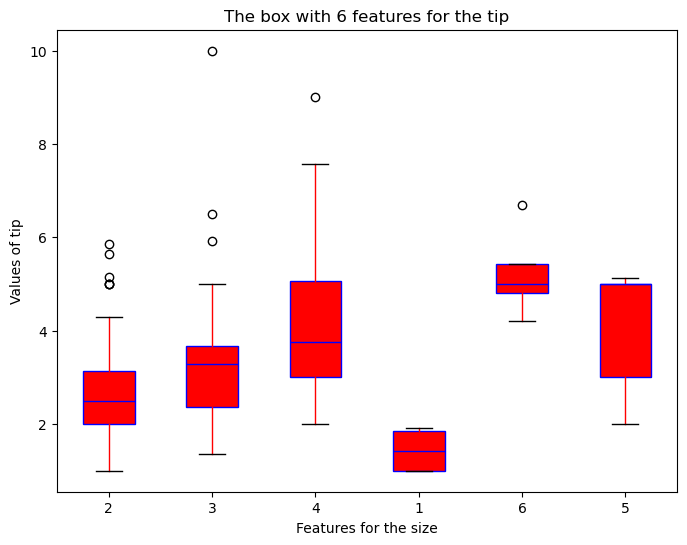

In [113]:
#问题6
plt.figure(figsize=(8, 6))#创建画布
def Boxplot_tip_by_size(data,base_color,edge_color,median_color):
    sizes = data['size'].unique()
    num_sizes = len(sizes)
    tip_by_size =  data.groupby('size', observed= True)['tip']
    tip_data_by_size = []
    for size in sizes:
        tip_data_by_size.append(tip_by_size.get_group(size)) # 将不同size的数据放入列表中
    plt.boxplot(tip_data_by_size
                    , labels=tip_by_size.groups.keys()
                    , patch_artist = True # 箱子是否颜色填充
                    , medianprops = {'color': edge_color} # 中位数线颜色
                    , boxprops = {'color': edge_color, 'facecolor': median_color} # 箱体颜色
                    # 猫须颜色whisker
                    , whiskerprops = {'color': median_color}# 猫须界限颜色whisker cap
                    , capprops = {'color': base_color}) # 猫须界限颜色whisker cap
    plt.xticks([i for i in range(1,num_sizes+1)], sizes)
    plt.title(f'The box with {num_sizes} features for the tip')
    plt.xlabel('Features for the size')
    plt.ylabel('Values of tip')
    plt.show()

Boxplot_tip_by_size(data,'black','blue','red')

smoker       Yes        No
sex                       
Male    3.051167  3.113402
Female  2.931515  2.773519


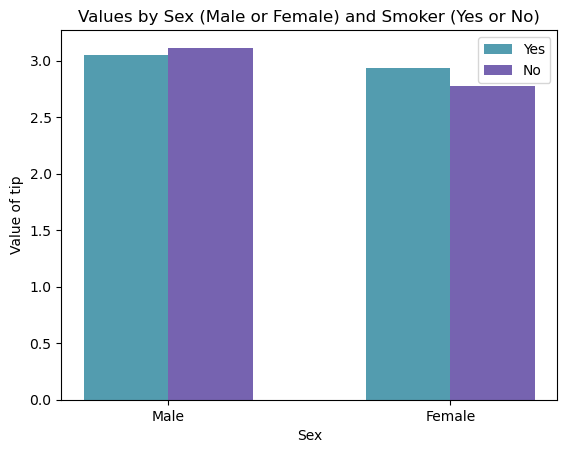

In [172]:
#问题7
def groupedbarplot(y_data, colors, x_label, y_label, title):
    # 计算x轴的刻度
    
    #col = y_data.keys()
    col = y_data.columns

    #index = y_data[col[0]].keys()
    index = y_data.index
    
    num_col = len(col)
    num_index = len(index)
    
    x = np.arange(num_index)
    #_, ax = plt.subplots()
    # 设置每一组柱状图的宽度
    total_width = 0.6
    # 设置每一个柱状图的宽度
    ind_width =  total_width / num_col
    # 计算每一个柱状图的中心偏移
    alteration = np.arange(-total_width/2+ind_width/2, total_width/2+ind_width/2, ind_width)

    # 分别绘制每一个柱状图
    for i in range(num_index):
        # 横向散开绘制
        for j in range(num_col):
            if i == 0:
                plt.bar( x[i] + alteration[j] , y_data.loc[index[i],col[j]], color = colors[j], label = y_data.keys()[j], width = ind_width)
            else:
                plt.bar( x[i] + alteration[j] , y_data.loc[index[i],col[j]], color = colors[j], width = ind_width)
    plt.xticks(x, index)
    plt.ylabel(y_label)
    plt.xlabel(x_label)
    plt.title(title)
    plt.legend(loc = 'upper right')

#mean_by_smoker_co_sex = data[['tip', 'smoker', 'sex']].pivot_table(index='sex', columns='smoker',values='tip')
# mean_by_smoker_co_sex = data[['tip', 'smoker', 'sex']].groupby(['sex', 'smoker'], observed= True).agg({'tip':'mean'}).unstack()
mean_by_smoker_co_sex = data[['tip', 'smoker', 'sex']].groupby(['sex', 'smoker'], observed= True)['tip'].mean().unstack()
print(mean_by_smoker_co_sex)

groupedbarplot( y_data = mean_by_smoker_co_sex
               
               , colors = ['#539caf', '#7663b0']
               , x_label = 'Sex'
               , y_label = 'Value of tip'
               , title = 'Values by Sex (Male or Female) and Smoker (Yes or No)')

## 练习4：泰坦尼克号海难幸存状况分析 (8个题)

1. 不同仓位等级中幸存和遇难的乘客比例（提示：箱图或者提琴图）
2. 不同性别的幸存比例（提示：箱图或者提琴图）
3. 幸存和遇难乘客的票价分布（提示：箱图或者提琴图）
4. 幸存和遇难乘客的年龄分布（提示：箱图或者提琴图）
5. 不同上船港口的乘客仓位等级分布（提示：箱图或者提琴图）
6. 幸存和遇难乘客堂兄弟姐妹的数量分布（提示：箱图或者提琴图）
7. 幸存和遇难乘客父母子女的数量分布（提示：箱图或者提琴图）
8. 单独乘船与否和幸存之间有没有联系（提示：统计柱状图）

In [236]:
data = sns.load_dataset("titanic")
data.head()
# 幸存与否，仓位等级，性别，年龄，堂兄弟姐妹数，父母子女数，票价，上船港口缩写，仓位等级，人员分类，是否成年男性，所在甲板，上船港口，是否幸存，是否单独乘船

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


        survived  unsurvived  total  survival_rate  unsurvival_rate
pclass                                                             
1            136          80    216       0.629630         0.370370
2             87          97    184       0.472826         0.527174
3            119         372    491       0.242363         0.757637


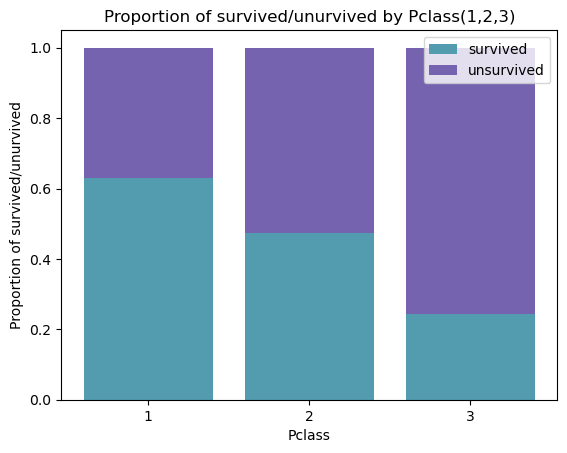

In [237]:
#问题1
df_sur = data.groupby('pclass',observed= True)['survived'].sum()
df_tot= data.groupby('pclass',observed= True)['survived'].count()

data_pcl = pd.concat([df_sur, df_tot], axis=1, keys=['survived', 'total'])
data_pcl['unsurvived'] = data_pcl['total'] - data_pcl['survived']
data_pcl = data_pcl[['survived', 'unsurvived', 'total']]
data_pcl['survival_rate'] = data_pcl['survived']/data_pcl['total']
data_pcl['unsurvival_rate'] = data_pcl['unsurvived']/data_pcl['total']
print(data_pcl)

def stackedbarplot(x_data, y_data_list, y_data_names, colors, x_label, y_label, title):
    _, ax = plt.subplots()
    # 循环绘制堆积柱状图
    for i in range(0, len(y_data_list)):
        if i == 0:
            ax.bar(x_data, y_data_list[i], color = colors[i], align = 'center', label = y_data_names[i])
        else:
            # 采用堆积的方式，除了第一个分类，后面的分类都从前一个分类的柱状图接着画
            # 用归一化保证最终累积结果为1，下面bottom参数表示纵向从哪里开始画
            ax.bar(x_data, y_data_list[i], color = colors[i], bottom = y_data_list[i - 1], align = 'center', label = y_data_names[i])
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title)
    ax.legend(loc = 'upper right') # 设定图例位置

stackedbarplot(x_data = data_pcl.index.values.astype(str) #['1','2','3']
               , y_data_list = [data_pcl['survival_rate'], data_pcl['unsurvival_rate']]
               , y_data_names = ['survived', 'unsurvived']
               , colors = ['#539caf', '#7663b0']
               , x_label = 'Pclass'
               , y_label = 'Proportion of survived/unurvived'
               , title = 'Proportion of survived/unurvived by Pclass(1,2,3)')

        survived  unsurvived  total  survival_rate  unsurvival_rate
sex                                                                
female       233          81    314       0.742038         0.257962
male         109         468    577       0.188908         0.811092


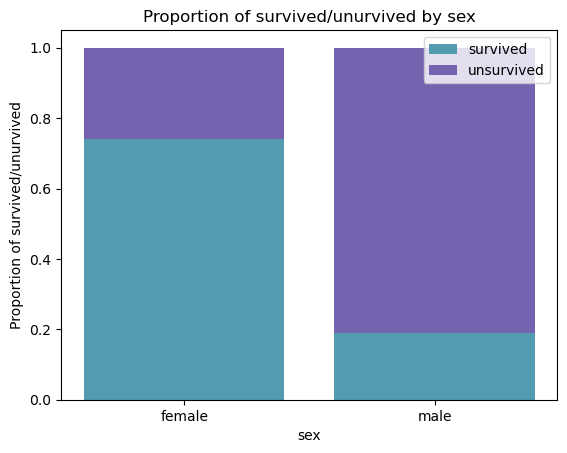

In [238]:
#问题2
df_sur = data.groupby('sex',observed= True)['survived'].sum()
df_tot = data.groupby('sex',observed= True)['survived'].count()

data_sex = pd.concat([df_sur, df_tot], axis=1, keys=['survived', 'total'])
data_sex['unsurvived'] = data_sex['total'] - data_sex['survived']
data_sex = data_sex[['survived', 'unsurvived', 'total']]
data_sex['survival_rate'] = data_sex['survived']/data_sex['total']
data_sex['unsurvival_rate'] = data_sex['unsurvived']/data_sex['total']
print(data_sex)

stackedbarplot(x_data = data_sex.index.values.astype(str) 
               , y_data_list = [data_sex['survival_rate'], data_sex['unsurvival_rate']]
               , y_data_names = ['survived', 'unsurvived']
               , colors = ['#539caf', '#7663b0']
               , x_label = 'sex'
               , y_label = 'Proportion of survived/unurvived'
               , title = 'Proportion of survived/unurvived by sex')


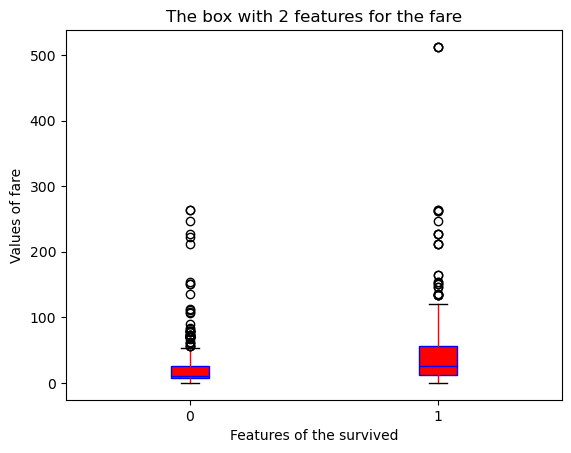

In [239]:
#问题3

def Boxplot_feature_by_survived(data_,feature,base_color,edge_color,median_color):
    surviveds = data_['survived'].unique()
    num_surviveds  = len(surviveds)
    feature_by_survived =  data_.groupby('survived', observed= True)[feature]
    feature_data_by_survived= []
    for survived in surviveds:
        feature_data_by_survived.append(feature_by_survived.get_group(survived)) # 将不同survived的数据放入列表中
    plt.boxplot(feature_data_by_survived
                    , labels=feature_by_survived.groups.keys()
                    , patch_artist = True # 箱子是否颜色填充
                    , medianprops = {'color': edge_color} # 中位数线颜色
                    , boxprops = {'color': edge_color, 'facecolor': median_color} # 箱体颜色
                    # 猫须颜色whisker
                    , whiskerprops = {'color': median_color}# 猫须界限颜色whisker cap
                    , capprops = {'color': base_color}) # 猫须界限颜色whisker cap
    plt.xticks([i for i in range(1, num_surviveds + 1)], surviveds)
    plt.title(f'The box with {num_surviveds} features for the ' + feature )
    plt.xlabel('Features of the survived')
    plt.ylabel('Values of '+ feature)
    plt.show()

Boxplot_feature_by_survived(data,'fare','black','blue','red')

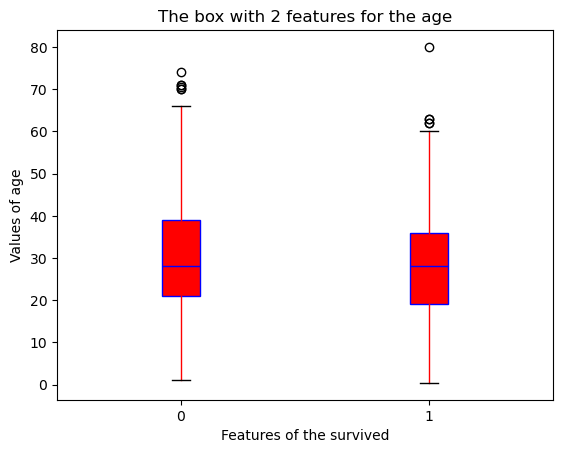

In [240]:
#问题4
data_age = data.dropna(subset = ['age']) # 删除age中的缺失值

Boxplot_feature_by_survived(data_age,'age','black','blue','red')

pclass      1    2    3
embarked               
C          85   17   66
Q           2    3   72
S         127  164  353


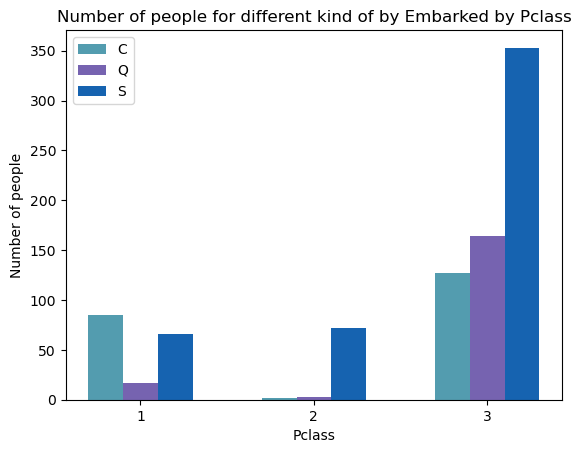

In [259]:
#问题5

#  通过groupby函数，按照embarked和pclass分组，通过survived统计人数
data_by_embarked_co_pclass = data[['survived', 'pclass', 'embarked']].groupby(['embarked','pclass'], observed= True)['survived'].count().unstack() 
print(data_by_embarked_co_pclass)

def groupedbarplot(y_data, colors, x_label, y_label, title):
    # 输入数据拆分和维度分析
    col = y_data.columns
    index = y_data.index
    
    num_col = len(col)
    num_index = len(index)
    x = np.arange(num_index)
    
    # 设置每一组柱状图的宽度
    total_width = 0.6
    # 设置每一个柱状图的宽度
    ind_width =  total_width / num_col
    # 计算每一个柱状图的中心偏移
    alteration = np.arange(-total_width/2+ind_width/2, total_width/2+ind_width/2, ind_width)

    # 分别绘制每一个柱状图
    for i in range(num_index):
        # 横向散开绘制
        for j in range(num_col):
            if i == 0:
                plt.bar( x[i] + alteration[j] , y_data.loc[index[i],col[j]], color = colors[j], label = index[j], width = ind_width)
            else:
                plt.bar( x[i] + alteration[j] , y_data.loc[index[i],col[j]], color = colors[j], width = ind_width)
    plt.xticks(x, col)
    plt.ylabel(y_label)
    plt.xlabel(x_label)
    plt.title(title)
    plt.legend(loc = 'upper left')

groupedbarplot(data_by_embarked_co_pclass
               , ['#539caf', '#7663b0','#1663b0']
               , 'Pclass'
               , 'Number of people'
               , 'Number of people for different kind of by Embarked by Pclass')

sibsp
0    608
1    209
2     28
3     16
4     18
5      5
8      7
Name: sibsp, dtype: int64


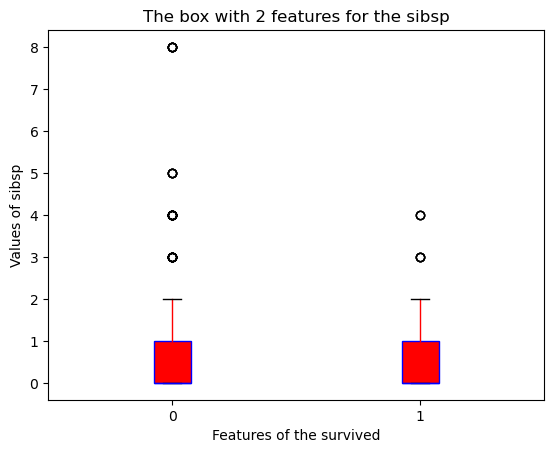

In [266]:
# 问题6

print(data.groupby('sibsp',observed= True)['sibsp'].count())

Boxplot_feature_by_survived(data,'sibsp','black','blue','red')

parch
0    678
1    118
2     80
3      5
4      4
5      5
6      1
Name: parch, dtype: int64


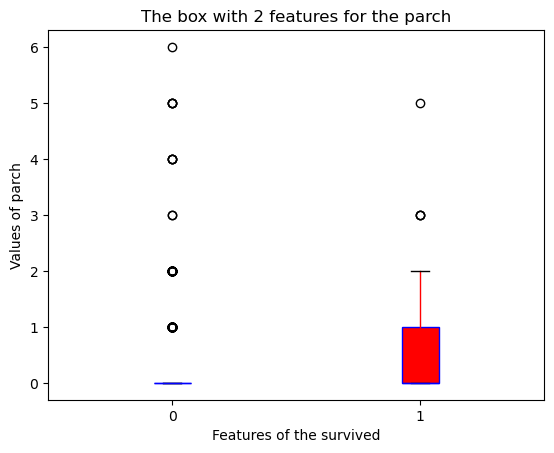

In [269]:
#问题7
print(data.groupby('parch',observed= True)['parch'].count())

Boxplot_feature_by_survived(data,'parch','black','blue','red')

survived    0    1
alone             
False     175  179
True      374  163


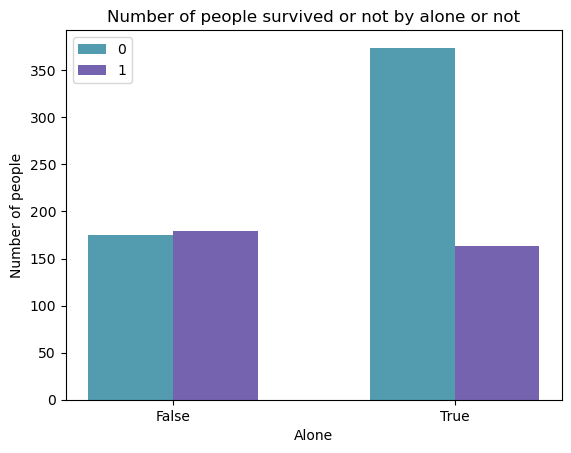

In [288]:
#问题8

def groupedbarplot(y_data, colors, x_label, y_label, title):
    # 输入数据拆分和维度分析
    col = y_data.columns
    index = y_data.index
    
    num_col = len(col)
    num_index = len(index)
    x = np.arange(num_index)
    
    # 设置每一组柱状图的宽度
    total_width = 0.6
    # 设置每一个柱状图的宽度
    ind_width =  total_width / num_col
    # 计算每一个柱状图的中心偏移
    alteration = np.arange(-total_width/2+ind_width/2, total_width/2+ind_width/2, ind_width)

    # 分别绘制每一个柱状图
    for i in range(num_index):
        # 横向散开绘制
        for j in range(num_col):
            plt.bar( x[i] + alteration[j] , y_data.loc[index[i],col[j]], color = colors[j], width = ind_width)
    plt.xticks(x, index)
    plt.ylabel(y_label)
    plt.xlabel(x_label)
    plt.title(title)
    plt.legend(col, loc = 'upper left')

data_by_alone_co_survived = data[['alone','survived']].groupby(['alone','survived'], observed= True)['survived'].count().unstack() 
print(data_by_alone_co_survived)

groupedbarplot(data_by_alone_co_survived
               , ['#539caf', '#7663b0']
               , 'Alone'
               , 'Number of people'
               , 'Number of people survived or not by alone or not')